In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [3]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, f1_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
import category_encoders as ce
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn import svm
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, average_precision_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, TunedThresholdClassifierCV, FixedThresholdClassifier
from sklearn.model_selection import RepeatedStratifiedKFold


### Область работы 2 (поиск  модели .... )

In [6]:
# мЕТРИКА accuracy , наны в тесте есть 

In [7]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv'

In [8]:
df = pd.read_csv(path_train)

In [9]:
df.head(3)

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,island,sex,year,species
0,17.8,58.0,3700,181.0,Dream,female,2007,Chinstrap
1,18.0,36.5,3150,182.0,Dream,female,2007,Adelie
2,19.9,51.3,3700,198.0,Dream,male,2007,Chinstrap


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_depth_mm      258 non-null    float64
 1   bill_length_mm     256 non-null    float64
 2   body_mass_g        261 non-null    int64  
 3   flipper_length_mm  257 non-null    float64
 4   island             261 non-null    object 
 5   sex                253 non-null    object 
 6   year               261 non-null    int64  
 7   species            261 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 16.4+ KB


In [11]:
df.describe()

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,year
count,258.000000,256.000000,261.000000,257.000000,261.000000
mean,17.272093,43.804688,4186.111111,200.750973,2008.015326
std,2.069774,5.420808,761.660074,13.900323,0.813205
min,13.100000,33.500000,2700.000000,172.000000,2007.000000
25%,15.625000,39.075000,3600.000000,190.000000,2007.000000
50%,17.500000,44.700000,4050.000000,197.000000,2008.000000
75%,18.875000,48.125000,4725.000000,213.000000,2009.000000
max,21.500000,58.000000,5950.000000,231.000000,2009.000000


In [12]:
df.duplicated().sum() # Колво дубликатов

10

In [13]:
df = df.drop_duplicates()

In [14]:
df['species'].value_counts()

species
Adelie       112
Gentoo        87
Chinstrap     52
Name: count, dtype: int64

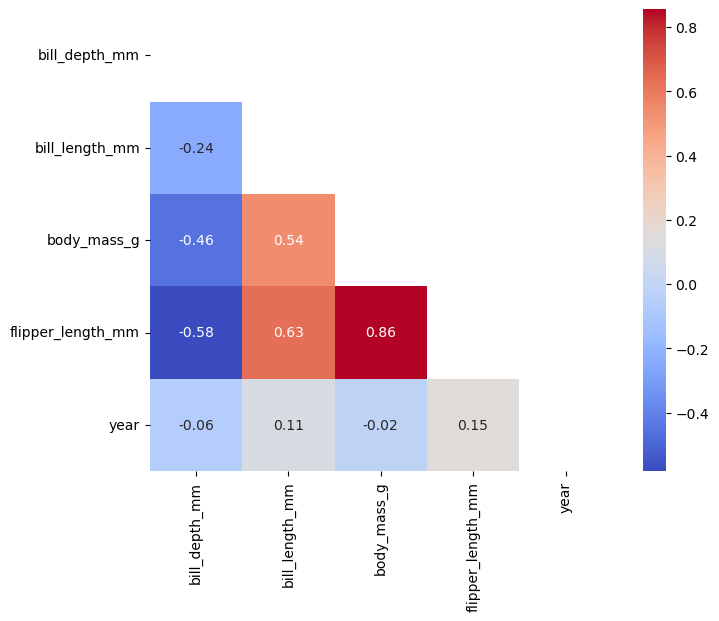

In [15]:
corr_matrix = df.drop(['island', 'sex', 'species'], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

In [16]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
print(missing_summary)

Размерность датафрейма:
(251, 8)

Сводка по отсутствующим значениям и уникальным значениям:
                   Missing Values Count  Missing Values Percentage  \
bill_depth_mm                         3                       1.20   
bill_length_mm                        5                       1.99   
body_mass_g                           0                       0.00   
flipper_length_mm                     4                       1.59   
island                                0                       0.00   
sex                                   8                       3.19   
year                                  0                       0.00   
species                               0                       0.00   

                   Unique Values Count  
bill_depth_mm                       78  
bill_length_mm                     138  
body_mass_g                         83  
flipper_length_mm                   54  
island                               3  
sex                            

In [17]:
df['species'].unique()

array(['Chinstrap', 'Adelie', 'Gentoo'], dtype=object)

In [18]:
print(df.columns)
print('Количество колонок')
print(len(df.columns))

Index(['bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm',
       'island', 'sex', 'year', 'species'],
      dtype='object')
Количество колонок
8


In [19]:
X = df.drop('species', axis=1)
y = df['species']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [21]:
def classify_columns(df):
    numeric_columns = []
    categorical_columns = []

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            numeric_columns.append(column)
        else:
            categorical_columns.append(column)

    return numeric_columns, categorical_columns

numeric_columns, categorical_columns = classify_columns(df)

print("Числовые колонки:", numeric_columns)
print("Категориальные колонки:", categorical_columns)


Числовые колонки: ['bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'year']
Категориальные колонки: ['island', 'sex', 'species']


In [22]:
cat_features = ['island', 'sex']
axis_features = ['bill_depth_mm', 'bill_length_mm']
num_features = ['body_mass_g', 'flipper_length_mm', 'year']

In [23]:
axis_transformer = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
    ('polynom', PolynomialFeatures(2, include_bias=False)),  # Поставить True, если модель не имеет свободного члена
    ('scaler', 'passthrough')  # Это место будет заменяться скейлерами через GridSearchCV
])

# Пайплайн для числовых признаков
num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
    ('scaler', 'passthrough')  # Здесь также заменяется скейлер
])

# Пайплайн для категориальных признаков
cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение пропусков наиболее частым значением
    ('onehot', OneHotEncoder(sparse_output=False))  # Кодирование категориальных переменных
])

# Объединение всех трансформеров в ColumnTransformer
CT = ColumnTransformer([
    ("axis_transformer", axis_transformer, axis_features),
    ("num", num, num_features),
    ("cat", cat, cat_features)
]).set_output(transform='pandas')

# Вывод информации о ColumnTransformer
display(CT)

ct = CT.fit_transform(X_train)

ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20)),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', 'passthrough')]),
                                 ['bill_depth_mm', 'bill_length_mm']),
                                ('num',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20)),
                                                 ('scaler', 'passthrough')]),
                                 ['body_mass_g', 'flipper_length_mm', 'year']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['island', 'sex'])])

In [24]:
gnb = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', LogisticRegression(solver='lbfgs', max_iter=10000))
])

In [25]:
# gnb.fit(X_train, y_train)

In [26]:
# y_pred = gnb.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

## Кросс валидация

In [28]:
scaling = [MinMaxScaler(), StandardScaler(), RobustScaler()]

param_grid = [
    {
        'preproc__axis_transformer__scaler': scaling,
        'preproc__num__scaler': scaling,
        'estimator__penalty': ['l2', 'l1'], 
        'estimator__solver': ['saga'],
        'estimator__class_weight': ['balanced'],
        'estimator__max_iter': [8000]
    },
    {
        'preproc__axis_transformer__scaler': scaling,
        'preproc__num__scaler': scaling,
        'estimator__penalty': ['l2', None],  
        'estimator__solver': ['lbfgs', 'newton-cg', 'sag'],
        'estimator__class_weight': ['balanced'],
        'estimator__max_iter': [8000]
    }
]

In [29]:
cv = StratifiedKFold(n_splits=4, shuffle=True)

grid = GridSearchCV(gnb, param_grid, cv=cv, return_train_score=True, n_jobs=-1, scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('axis_transformer',
                                                                         Pipeline(steps=[('missing_num',
                                                                                          IterativeImputer(max_iter=20)),
                                                                                         ('polynom',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          'passthrough')]),
                                                                         ['bill_depth_mm',
                                                                          'bill_length_mm']),
                                                                        ('num',
                                                                         Pip...
                         {'estimator__class_weight': ['balanced'],
                          'estimator__max_iter': [8000],
                          'estimator__penalty': ['l2', None],
                          'estimator__solver': ['lbfgs', 'newton-cg', 'sag'],
                          'preproc__axis_transformer__scaler': [MinMaxScaler(),
                                                                StandardScaler(),
                                                                RobustScaler()],
                          'preproc__num__scaler': [MinMaxScaler(),
                                                   StandardScaler(),
                                                   RobustScaler()]}],
             return_train_score=True, scoring='accuracy')

In [30]:
# pd.set_option('display.max_columns', None)  # Отображать все колонки

In [31]:
print("Средняя правильность для наилучшей модели кросс-валидации на валидационных тестовых наборах: {:.3f}\n".format(grid.best_score_))
print("Правильность для наилучшей модели на тестовом наборе: {:.3f}\n".format(grid.score(X_test, y_test)))

gridresults = pd.DataFrame(grid.cv_results_)  # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кросс-валидации на валидационных тестовых наборах: 1.000

Правильность для наилучшей модели на тестовом наборе: 1.000



,0,25,26,27,28,29,33,34,24,36,...,52,51,50,48,70,3,9,39,59,71
mean_fit_time,0.045277,0.051461,0.058272,0.048745,0.051099,0.050005,0.044603,0.046922,0.05039,0.043553,...,0.044843,0.046904,0.044321,0.055209,0.129954,0.045537,0.156101,0.048685,0.046024,0.111248
std_fit_time,0.005024,0.006822,0.008684,0.003909,0.000601,0.003865,0.007706,0.009665,0.001328,0.00574,...,0.003932,0.00391,0.011881,0.003919,0.01035,0.005242,0.044417,0.007538,0.005206,0.00346
mean_score_time,0.012605,0.012476,0.036595,0.017891,0.015111,0.015259,0.02176,0.022854,0.015065,0.017547,...,0.015145,0.013163,0.01867,0.010148,0.014688,0.012957,0.012762,0.016768,0.015277,0.011191
std_score_time,0.004349,0.004041,0.020471,0.004239,0.005141,0.005279,0.002654,0.010773,0.005455,0.001935,...,0.003579,0.005281,0.011868,0.000676,0.001869,0.004589,0.004288,0.005673,0.005232,0.001665
param_estimator__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,...,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced,balanced
param_estimator__max_iter,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,...,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000
param_estimator__penalty,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,...,None,None,None,None,None,l2,l1,l2,None,None
param_estimator__solver,saga,lbfgs,lbfgs,newton-cg,newton-cg,newton-cg,newton-cg,newton-cg,lbfgs,sag,...,lbfgs,lbfgs,lbfgs,lbfgs,sag,saga,saga,sag,newton-cg,sag
param_preproc__axis_transformer__scaler,MinMaxScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),...,RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),RobustScaler()
param_preproc__num__scaler,MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),...,StandardScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),RobustScaler()


In [32]:
gnb = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', SVC(probability=True))
])

In [33]:
scaling = [MinMaxScaler(), StandardScaler(), RobustScaler()]

param_grid = [
    {
        'preproc__axis_transformer__scaler': scaling,
        'preproc__num__scaler': scaling,
        'estimator': [SVC(probability=True, class_weight='balanced')],
        'estimator__C': [0.1, 1, 10, 100],  # Пример значений для C
        'estimator__gamma': ['scale', 'auto'],  # Значения для gamma
    }
]


In [34]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=42)  # 4 фолда, 3 повтора

grid = GridSearchCV(gnb, param_grid, cv=cv, return_train_score=True, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=4, n_splits=5, random_state=42),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('axis_transformer',
                                                                         Pipeline(steps=[('missing_num',
                                                                                          IterativeImputer(max_iter=20)),
                                                                                         ('polynom',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          'passthrough')]),
                                                                         ['bill_depth_mm',
                                                                          'bill_length_mm']),
                                                                        ('num...
             n_jobs=-1,
             param_grid=[{'estimator': [SVC(class_weight='balanced',
                                            probability=True)],
                          'estimator__C': [0.1, 1, 10, 100],
                          'estimator__gamma': ['scale', 'auto'],
                          'preproc__axis_transformer__scaler': [MinMaxScaler(),
                                                                StandardScaler(),
                                                                RobustScaler()],
                          'preproc__num__scaler': [MinMaxScaler(),
                                                   StandardScaler(),
                                                   RobustScaler()]}],
             return_train_score=True, scoring='accuracy')

In [35]:
print("Лучшие параметры:", grid.best_params_)
best_params = grid.best_params_

Лучшие параметры: {'estimator': SVC(class_weight='balanced', probability=True), 'estimator__C': 1, 'estimator__gamma': 'scale', 'preproc__axis_transformer__scaler': RobustScaler(), 'preproc__num__scaler': MinMaxScaler()}


In [36]:
print("Средняя правильность для наилучшей модели кросс-валидации на валидационных тестовых наборах: {:.3f}\n".format(grid.best_score_))
print("Правильность для наилучшей модели на тестовом наборе: {:.3f}\n".format(grid.score(X_test, y_test)))

gridresults = pd.DataFrame(grid.cv_results_)  # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

Средняя правильность для наилучшей модели кросс-валидации на валидационных тестовых наборах: 1.000

Правильность для наилучшей модели на тестовом наборе: 1.000



,35,24,26,33,25,45,34,36,54,32,...,19,28,29,27,2,1,0,9,11,10
mean_fit_time,0.049496,0.052918,0.053355,0.048175,0.049416,0.044385,0.048467,0.052976,0.052308,0.048794,...,0.044597,0.047201,0.052436,0.053439,0.05354,0.052293,0.051911,0.057266,0.055539,0.051485
std_fit_time,0.009319,0.009579,0.010255,0.006012,0.007778,0.006093,0.009815,0.012683,0.01271,0.009537,...,0.006882,0.008816,0.013482,0.010017,0.005941,0.004396,0.007178,0.011768,0.006819,0.004365
mean_score_time,0.01678,0.017947,0.017811,0.016606,0.017851,0.017793,0.01824,0.017598,0.018885,0.017292,...,0.016707,0.017313,0.018424,0.019806,0.016773,0.016089,0.020298,0.016981,0.01519,0.015575
std_score_time,0.00744,0.005158,0.007576,0.005249,0.007824,0.006215,0.005897,0.005953,0.009083,0.004622,...,0.009192,0.004887,0.008779,0.009051,0.003861,0.005391,0.005885,0.004236,0.006973,0.004816
param_estimator,"SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)",...,"SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)","SVC(class_weight='balanced', probability=True)"
param_estimator__C,1.0,1.0,1.0,1.0,1.0,10.0,1.0,10.0,100.0,1.0,...,1.0,1.0,1.0,1.0,0.1,0.1,0.1,0.1,0.1,0.1
param_estimator__gamma,auto,scale,scale,auto,scale,auto,auto,scale,scale,auto,...,scale,auto,auto,auto,scale,scale,scale,auto,auto,auto
param_preproc__axis_transformer__scaler,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler()
param_preproc__num__scaler,RobustScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),...,StandardScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),RobustScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),StandardScaler()
params,"{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...",...,"{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro...","{'estimator': SVC(class_weight='balanced', pro..."
